CFD Sources:
- https://github.com/emhayki/CFD-Fundamental/blob/main/CFD-Fundamental-Guide.pdf
- https://github.com/barbagroup/CFDPython/blob/master/lessons/02_Step_2.ipynb


Theory sources:
- https://www.math.toronto.edu/jko/APM346_summary_2_2020.pdf
- https://youtu.be/ec7L8wRABy4
- https://folk.ntnu.no/leifh/teaching/tkt4140/._main042.html

Using Eq. (4) of `1DLinearConvectionEquation` notebook

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0 \tag{1}
$$

Instead of a constant factor c muntiplying the second term, now there is the solution u multiplying it. Thus, the second term of the equation is now nonlinear. We are going to use the same discretization scheme used with `1DLinearConvectionEquation` backward in space and forward in time.


$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0
\tag{2} 
$$

Solving Eq. (2) for $u_i^{n+1}$ 

$$
\begin{equation}
u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
\end{equation} \tag{3}
$$

In [36]:
import numpy as np
from matplotlib import pyplot as plt

In [37]:
total_x_length = 2
number_grid_points_x = 41
dx = total_x_length/(number_grid_points_x - 1)
number_of_timesteps = 100
# the same dt as in 1DLinearConvectionEquation dont converge appropriately
# dt = 0.025
# with a small dt
dt = 0.1*dx
print(dx)
print(dt)

0.05
0.005000000000000001


In [38]:
# fill the computational domain with ones
u = np.ones(number_grid_points_x)

# the elements of the initial conditions np.array u will be 2 between 0.5 and 1 [0.5,1] and 1 everywhere else in [0,2]
u[int(0.5/dx):int(1/dx+1)] = 2

# plotting the velocity profile in the space at t = 0 
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [39]:
# creating an auxiliar computational domain
un = np.ones(number_grid_points_x) 

# defining a results matrix
rows = number_of_timesteps
columns = number_grid_points_x
matrix = np.empty((rows+1, columns)) #the extra row will store the initial conditions

print(f'shape of the results matrix: {matrix.shape}')
initial_conditions = u.copy() # create a copy of the initial conditions

# storing the initial conditions np.array as time 0 solution
matrix[0,:] = initial_conditions

for n in range(number_of_timesteps): # run from 0 to number_of_timesteps times
    un = u.copy() #copy the existing values of u into un
    for i in range(1, number_grid_points_x): # with backward difference we must start with i = 1
        u[i] = un[i] - un[i]*(dt/dx)*(un[i] - un[i-1])
    matrix[n+1,:] = u # store the results 

# relocate the initial conditions into u to do more simulations with the same initial conditions by default
u = initial_conditions

print(f'for t = 0 the results are: {matrix[0]}')
print(f'for t = 1 the results are: {matrix[1]}')

shape of the results matrix: (101, 41)
for t = 0 the results are: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
for t = 1 the results are: [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.8 2.  2.  2.  2.  2.  2.  2.
 2.  2.  2.  1.1 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1. ]


Text(0.5, 0, 'X')

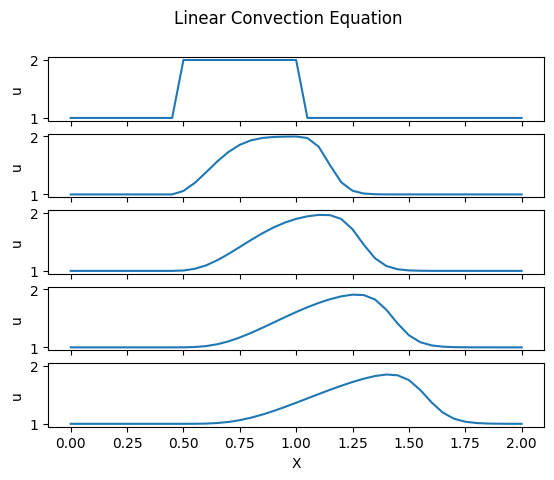

In [45]:
# print the results
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.suptitle('1D non-linear Convection Equation')

for i in range(0,5):
    axs[i].plot(np.linspace(0, total_x_length, number_grid_points_x), matrix[i*20,:])
    axs[i].set_ylabel('u')

axs[-1].set_xlabel('X')

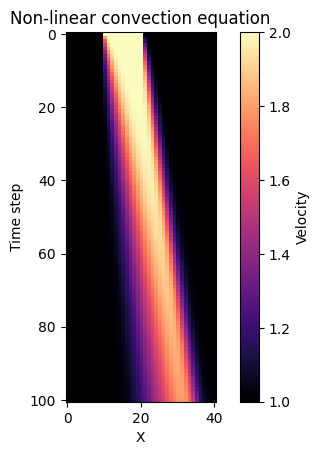

In [44]:
plt.imshow(matrix, cmap='magma')
plt.title("Non-linear convection equation") 
plt.xlabel("X")
plt.ylabel("Time step")
plt.colorbar().set_label('Velocity')
plt.show()